Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#statistical test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\FELICITA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Importing libraries for statistical test
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)

In [5]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\loan-train.csv")

In [6]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
data.shape

(614, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


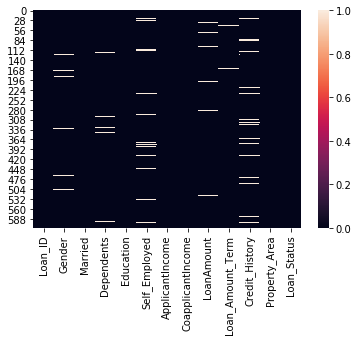

In [10]:
sns.heatmap(data.isnull())

Exploratory Data Analysis

In [11]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [14]:
data.Loan_Status.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

Gender

In [15]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data Type
 object
Unique Datas
 ['Male' 'Female' nan]
Describing the data
 count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
Count of each unique datas
 Male      489
Female    112
Name: Gender, dtype: int64


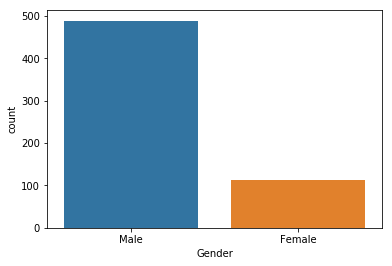

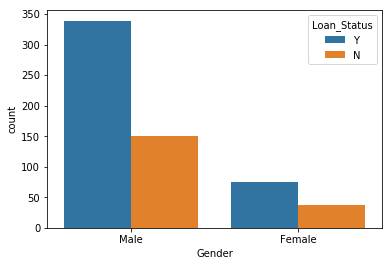

(0.23697508750826923, 0.6263994534115932, 1, array([[ 34.84858569,  77.15141431],
       [152.15141431, 336.84858569]]))


In [16]:
print("Data Type\n",data.Gender.dtype)
print("Unique Datas\n",data.Gender.unique())
print("Describing the data\n",data.Gender.describe())
print("Count of each unique datas\n",data.Gender.value_counts())

sns.countplot(data.Gender)
plt.show()
sns.countplot(data.Gender,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Gender=pd.crosstab(data.Gender,data.Loan_Status)
print(chi2_contingency(ct_Gender,correction=False))

since p value is greater than .05 we can drop the feature 

In [17]:
data.drop("Gender",axis=1,inplace=True)

In [18]:
data.columns

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Married

Data Type
 object
Unique Datas
 ['No' 'Yes' nan]
Describing the data
 count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
Count of each unique datas
 Yes    398
No     213
Name: Married, dtype: int64


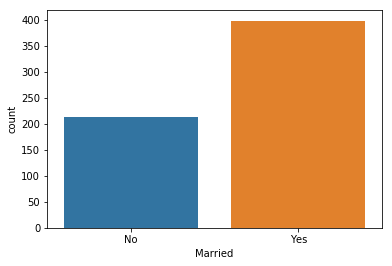

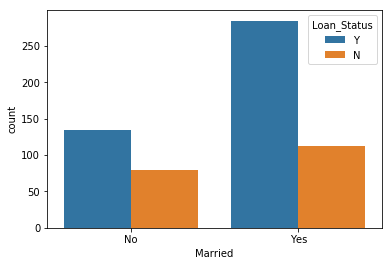

(4.870255560503662, 0.02732345377196271, 1, array([[ 66.93289689, 146.06710311],
       [125.06710311, 272.93289689]]))


In [19]:
print("Data Type\n",data.Married.dtype)
print("Unique Datas\n",data.Married.unique())
print("Describing the data\n",data.Married.describe())
print("Count of each unique datas\n",data.Married.value_counts())

sns.countplot(data.Married)
plt.show()
sns.countplot(data.Married,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Married=pd.crosstab(data.Married,data.Loan_Status)
print(chi2_contingency(ct_Married,correction=False))

In [20]:
data[data.Married.isnull()]

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [21]:
Marr_mode=data.Married.mode().values
Marr_mode

array(['Yes'], dtype=object)

In [22]:
data.Married.fillna("Yes",inplace=True)

In [23]:
data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [24]:
data.columns

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Dependents

Data Type
 object
Unique Datas
 ['0' '1' '2' '3+' nan]
Describing the data
 count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
Count of each unique datas
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


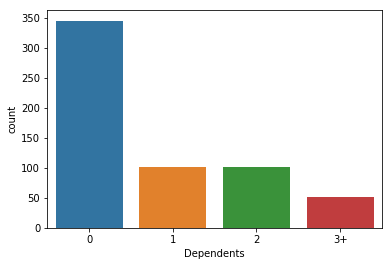

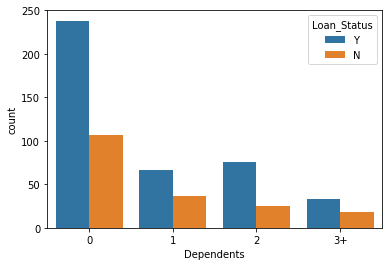

(3.158339770698263, 0.3678506740863211, 3, array([[107.12854758, 237.87145242],
       [ 31.67278798,  70.32721202],
       [ 31.36227045,  69.63772955],
       [ 15.83639399,  35.16360601]]))


In [25]:
print("Data Type\n",data.Dependents.dtype)
print("Unique Datas\n",data.Dependents.unique())
print("Describing the data\n",data.Dependents.describe())
print("Count of each unique datas\n",data.Dependents.value_counts())

sns.countplot(data.Dependents)
plt.show()
sns.countplot(data.Dependents,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Dependents=pd.crosstab(data.Dependents,data.Loan_Status)
print(chi2_contingency(ct_Dependents,correction=False))

In [26]:
data.drop("Dependents",axis=1,inplace=True)

In [27]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Education

Data Type
 object
Unique Datas
 ['Graduate' 'Not Graduate']
Describing the data
 count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Count of each unique datas
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


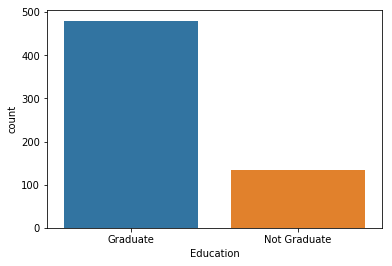

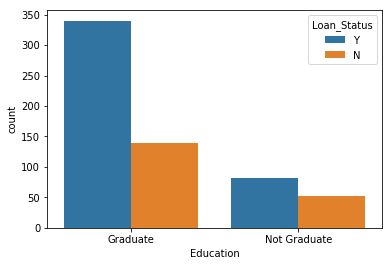

(4.5288927351787684, 0.03332717442347583, 1, array([[150.09771987, 329.90228013],
       [ 41.90228013,  92.09771987]]))


In [28]:
print("Data Type\n",data.Education.dtype)
print("Unique Datas\n",data.Education.unique())
print("Describing the data\n",data.Education.describe())
print("Count of each unique datas\n",data.Education.value_counts())

sns.countplot(data.Education)
plt.show()
sns.countplot(data.Education,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Education=pd.crosstab(data.Education,data.Loan_Status)
print(chi2_contingency(ct_Education,correction=False))

In [29]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Data Type
 object
Unique Datas
 ['No' 'Yes' nan]
Describing the data
 count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
Count of each unique datas
 No     500
Yes     82
Name: Self_Employed, dtype: int64


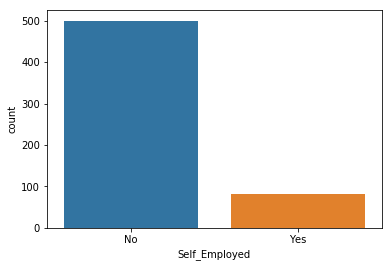

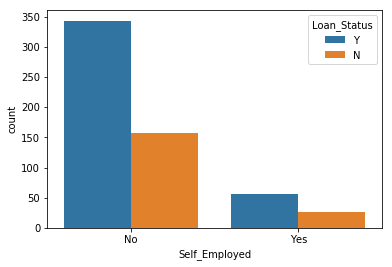

(0.0030864285864601513, 0.955695807982182, 1, array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))


In [30]:
print("Data Type\n",data.Self_Employed.dtype)
print("Unique Datas\n",data.Self_Employed.unique())
print("Describing the data\n",data.Self_Employed.describe())
print("Count of each unique datas\n",data.Self_Employed.value_counts())

sns.countplot(data.Self_Employed)
plt.show()
sns.countplot(data.Self_Employed,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Self_Employed=pd.crosstab(data.Self_Employed,data.Loan_Status)
print(chi2_contingency(ct_Self_Employed,correction=False))

In [31]:
data.drop("Self_Employed",axis=1,inplace=True)

In [32]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Data Type
 int64
Describing the data
 count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


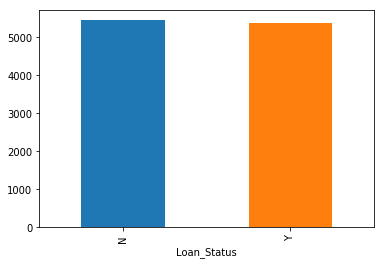

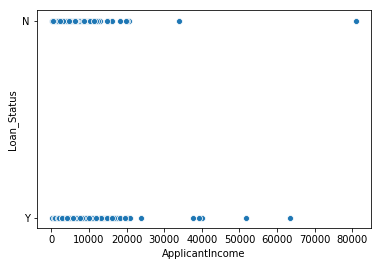

Anova test
                 df        sum_sq       mean_sq         F    PR(>F)
Loan_Status    1.0  5.074116e+05  5.074116e+05  0.013574  0.907288
Residual     612.0  2.287689e+10  3.738054e+07       NaN       NaN


In [33]:
print("Data Type\n",data.ApplicantIncome.dtype)
print("Describing the data\n",data.ApplicantIncome.describe())

data.groupby("Loan_Status")["ApplicantIncome"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="ApplicantIncome",y="Loan_Status",data=data)
plt.show()

model_ApplicantIncome=ols("ApplicantIncome ~ Loan_Status",data=data).fit()
anova_ApplicantIncome=sm.stats.anova_lm(model_ApplicantIncome)
print("Anova test\n",anova_ApplicantIncome)

In [34]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

CoapplicantIncome

Data Type
 float64
Describing the data
 count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


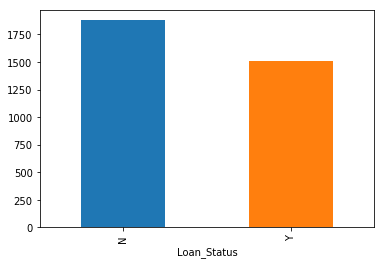

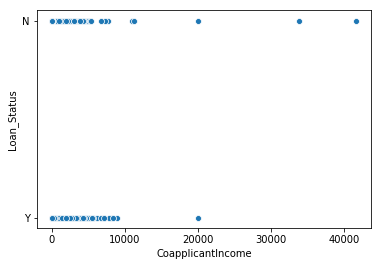

Anova test
                 df        sum_sq       mean_sq         F    PR(>F)
Loan_Status    1.0  1.838824e+07  1.838824e+07  2.151457  0.142948
Residual     612.0  5.230688e+09  8.546875e+06       NaN       NaN


In [35]:
print("Data Type\n",data.CoapplicantIncome.dtype)
print("Describing the data\n",data.CoapplicantIncome.describe())

data.groupby("Loan_Status")["CoapplicantIncome"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="CoapplicantIncome",y="Loan_Status",data=data)
plt.show()

model_CoapplicantIncome=ols("CoapplicantIncome ~ Loan_Status",data=data).fit()
anova_CoapplicantIncome=sm.stats.anova_lm(model_CoapplicantIncome)
print("Anova test\n",anova_CoapplicantIncome)

In [36]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

LoanAmount

Data Type
 float64
Describing the data
 count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


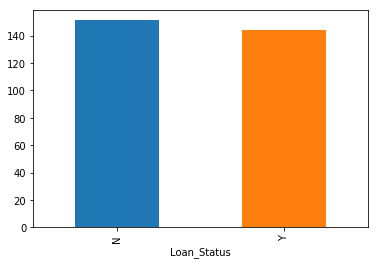

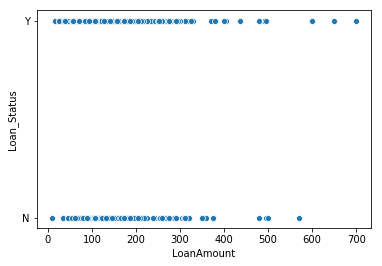

Anova test
                 df        sum_sq      mean_sq         F    PR(>F)
Loan_Status    1.0  6.028895e+03  6028.895082  0.822789  0.364736
Residual     590.0  4.323159e+06  7327.387351       NaN       NaN


In [37]:
print("Data Type\n",data.LoanAmount.dtype)
print("Describing the data\n",data.LoanAmount.describe())

data.groupby("Loan_Status")["LoanAmount"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="LoanAmount",y="Loan_Status",data=data)
plt.show()

model_LoanAmount=ols("LoanAmount ~ Loan_Status",data=data).fit()
anova_LoanAmount=sm.stats.anova_lm(model_LoanAmount)
print("Anova test\n",anova_LoanAmount)

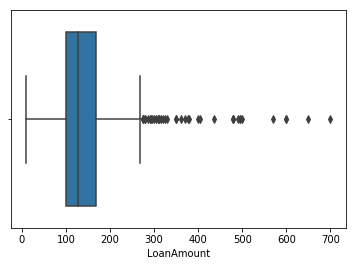

In [38]:
sns.boxplot(data.LoanAmount)

In [39]:
data[data.LoanAmount.isnull()]

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Yes,Graduate,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Yes,Graduate,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Yes,Graduate,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,No,Graduate,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Yes,Graduate,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Yes,Graduate,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,No,Graduate,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,No,Graduate,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Yes,Not Graduate,3992,0.0,NaN,180.0,1.0,Urban,N


In [40]:
data.LoanAmount.median()

128.0

In [41]:
data[data.LoanAmount.isnull()].index

Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
            338, 387, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')

In [42]:
data.LoanAmount.fillna(128.0,inplace=True)

In [43]:
data[data.LoanAmount.isnull()]

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [44]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_Amount_Term

In [45]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

Data Type
 float64
Describing the data
 count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


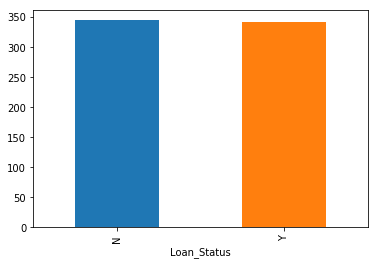

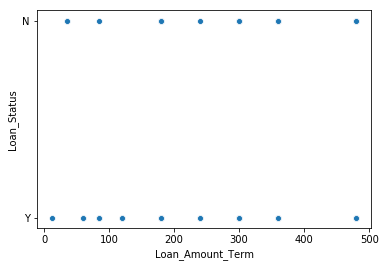

Anova test
                 df        sum_sq      mean_sq         F    PR(>F)
Loan_Status    1.0  1.148948e+03  1148.948107  0.270606  0.603118
Residual     598.0  2.539011e+06  4245.837879       NaN       NaN


In [46]:
print("Data Type\n",data.Loan_Amount_Term.dtype)
print("Describing the data\n",data.Loan_Amount_Term.describe())

data.groupby("Loan_Status")["Loan_Amount_Term"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="Loan_Amount_Term",y="Loan_Status",data=data)
plt.show()

model_Loan_Amount_Term=ols("Loan_Amount_Term ~ Loan_Status",data=data).fit()
anova_Loan_Amount_Term=sm.stats.anova_lm(model_Loan_Amount_Term)
print("Anova test\n",anova_Loan_Amount_Term)

In [47]:
data[data.Loan_Amount_Term.isnull()]

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Yes,Graduate,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Yes,Graduate,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Yes,Not Graduate,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,No,Graduate,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Yes,Not Graduate,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Yes,Not Graduate,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Yes,Graduate,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,No,Not Graduate,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Yes,Graduate,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,No,Not Graduate,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [48]:
data.Loan_Amount_Term.median()

360.0

In [49]:
data.Loan_Amount_Term.fillna(360,inplace=True)

In [50]:
data[data.Loan_Amount_Term.isnull()]

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [51]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Credit_History

In [52]:
data.Credit_History=data.Credit_History.astype("object")

Data Type
 object
Unique Datas
 [1.0 0.0 nan]
Describing the data
 count     564.0
unique      2.0
top         1.0
freq      475.0
Name: Credit_History, dtype: float64
Count of each unique datas
 1.0    475
0.0     89
Name: Credit_History, dtype: int64


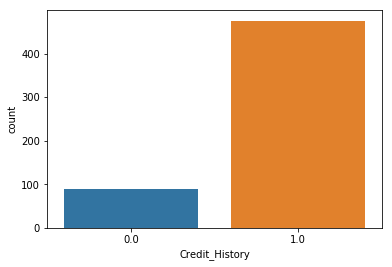

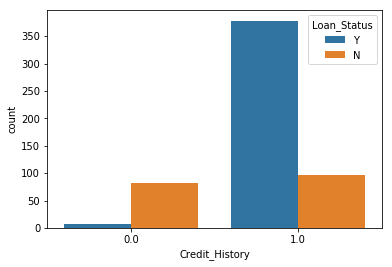

(177.9320468515689, 1.3707318825450436e-40, 1, array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))


In [53]:
print("Data Type\n",data.Credit_History.dtype)
print("Unique Datas\n",data.Credit_History.unique())
print("Describing the data\n",data.Credit_History.describe())
print("Count of each unique datas\n",data.Credit_History.value_counts())

sns.countplot(data.Credit_History)
plt.show()
sns.countplot(data.Credit_History,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Credit_History=pd.crosstab(data.Credit_History,data.Loan_Status)
print(chi2_contingency(ct_Credit_History,correction=False))

In [54]:
data[data.Credit_History.isnull()]

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,No,Not Graduate,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Yes,Graduate,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Yes,Graduate,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Yes,Graduate,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Yes,Not Graduate,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Yes,Graduate,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Yes,Not Graduate,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,No,Graduate,6782,0.0,128.0,360.0,NaN,Urban,N
117,LP001405,Yes,Graduate,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,No,Graduate,3692,0.0,93.0,360.0,NaN,Rural,Y


In [55]:
data.Credit_History.mode()

0    1
dtype: object

In [56]:
data.Credit_History.fillna(1,inplace=True)

In [57]:
data.columns

Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Property_Area

Data Type
 object
Unique Datas
 ['Urban' 'Rural' 'Semiurban']
Describing the data
 count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Count of each unique datas
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


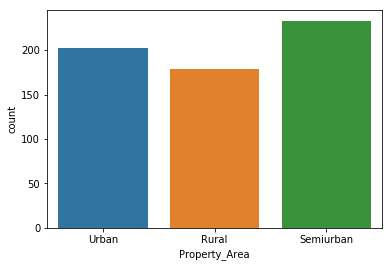

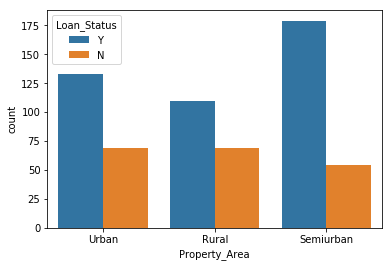

(12.297623130485675, 0.0021360187811644937, 2, array([[ 55.97394137, 123.02605863],
       [ 72.85993485, 160.14006515],
       [ 63.16612378, 138.83387622]]))


In [58]:
print("Data Type\n",data.Property_Area.dtype)
print("Unique Datas\n",data.Property_Area.unique())
print("Describing the data\n",data.Property_Area.describe())
print("Count of each unique datas\n",data.Property_Area.value_counts())

sns.countplot(data.Property_Area)
plt.show()
sns.countplot(data.Property_Area,hue=data.Loan_Status)
plt.show()

# Chi-Square Test
ct_Property_Area=pd.crosstab(data.Property_Area,data.Loan_Status)
print(chi2_contingency(ct_Property_Area,correction=False))

In [59]:
data.isnull().sum()

Loan_ID              0
Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
x=data.drop("Loan_Status",axis=1)
x.head()

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban
1,LP001003,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban


In [61]:
X=pd.get_dummies(x,drop_first=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y=data.Loan_Status
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [64]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

             precision    recall  f1-score   support

          N       0.92      0.47      0.62       127
          Y       0.82      0.98      0.89       302

avg / total       0.85      0.83      0.81       429

[[ 60  67]
 [  5 297]]
             precision    recall  f1-score   support

          N       0.93      0.38      0.54        65
          Y       0.75      0.98      0.85       120

avg / total       0.81      0.77      0.74       185

[[ 25  40]
 [  2 118]]


Resampling

In [65]:
train = pd.concat([X_train,y_train],axis=1)

In [66]:
train = train.reset_index(drop=True)

In [67]:
non_Loan_Status = train[train.Loan_Status == "N"]
print('Non Loan_Status',len(non_Loan_Status))
Loan_Status_yes = train[train.Loan_Status == "Y"]
print('Loan_Status_yes =',len(Loan_Status_yes))

Non Loan_Status 127
Loan_Status_yes = 302


In [68]:
# unsample minority with replacement
from sklearn.utils import resample

In [69]:
non_Loan_Status_upsampled1= resample(non_Loan_Status,replace=True,n_samples=len(Loan_Status_yes),random_state=27)

In [70]:
new_train = pd.concat([Loan_Status_yes,non_Loan_Status_upsampled1])

In [71]:
new_train.Loan_Status.value_counts()

N    302
Y    302
Name: Loan_Status, dtype: int64

In [72]:
X_train=new_train.drop("Loan_Status",axis=1)

In [73]:
y_train=new_train["Loan_Status"]

In [74]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))


             precision    recall  f1-score   support

          N       0.98      0.91      0.95       302
          Y       0.92      0.98      0.95       302

avg / total       0.95      0.95      0.95       604

[[276  26]
 [  6 296]]


In [75]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

             precision    recall  f1-score   support

          N       0.93      0.42      0.57        65
          Y       0.76      0.98      0.86       120

avg / total       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
DRC=DecisionTreeClassifier()
DRC.fit(X_train,y_train)
y_train_pred=DRC.predict(X_train)
y_test_pred=DRC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

             precision    recall  f1-score   support

          N       1.00      1.00      1.00       302
          Y       1.00      1.00      1.00       302

avg / total       1.00      1.00      1.00       604

[[302   0]
 [  0 302]]
             precision    recall  f1-score   support

          N       0.75      0.46      0.57        65
          Y       0.76      0.92      0.83       120

avg / total       0.76      0.76      0.74       185

[[ 30  35]
 [ 10 110]]


In [86]:
n_estimators=list(range(50,500,50))
max_depth=list(range(5,100,5))
min_samples_split=list(range(2,20,2))
max_features=["auto","sqrt","log2"]
DRC_cla={"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split}


from sklearn.model_selection import RandomizedSearchCV
DRC_model = RandomizedSearchCV(estimator = DRC,param_distributions = DRC_cla,cv=4,random_state = 0)

In [87]:
DRC_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [88]:
DRC_model.best_params_

{'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 55}

In [90]:
DRC=DecisionTreeClassifier(min_samples_split=2,max_depth=40)
DRC.fit(X_train,y_train)
y_train_pred=DRC.predict(X_train)
y_test_pred=DRC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

             precision    recall  f1-score   support

          N       1.00      1.00      1.00       302
          Y       1.00      1.00      1.00       302

avg / total       1.00      1.00      1.00       604

[[302   0]
 [  0 302]]
             precision    recall  f1-score   support

          N       0.76      0.43      0.55        65
          Y       0.75      0.93      0.83       120

avg / total       0.75      0.75      0.73       185

[[ 28  37]
 [  9 111]]


In [79]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_train_pred=RFC.predict(X_train)
y_test_pred=RFC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

             precision    recall  f1-score   support

          N       1.00      1.00      1.00       302
          Y       1.00      1.00      1.00       302

avg / total       1.00      1.00      1.00       604

[[302   0]
 [  1 301]]
             precision    recall  f1-score   support

          N       0.71      0.45      0.55        65
          Y       0.75      0.90      0.82       120

avg / total       0.74      0.74      0.72       185

[[ 29  36]
 [ 12 108]]
